In [1]:
import pandas as pd
import numpy as np



import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
import seaborn as sns
 

%matplotlib inline
%precision 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
rides = pd.read_csv('./datasets/portland-oregon-average-monthly-.csv',
                    names=['date','monthly_avg'],skiprows=[0],
                   skipfooter=2, engine='python',parse_dates=[0],
                   index_col=[0])
rides.head()

,monthly_avg
date,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


In [3]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1960-01-01 to 1969-06-01
Data columns (total 1 columns):
monthly_avg    114 non-null int64
dtypes: int64(1)
memory usage: 1.8 KB


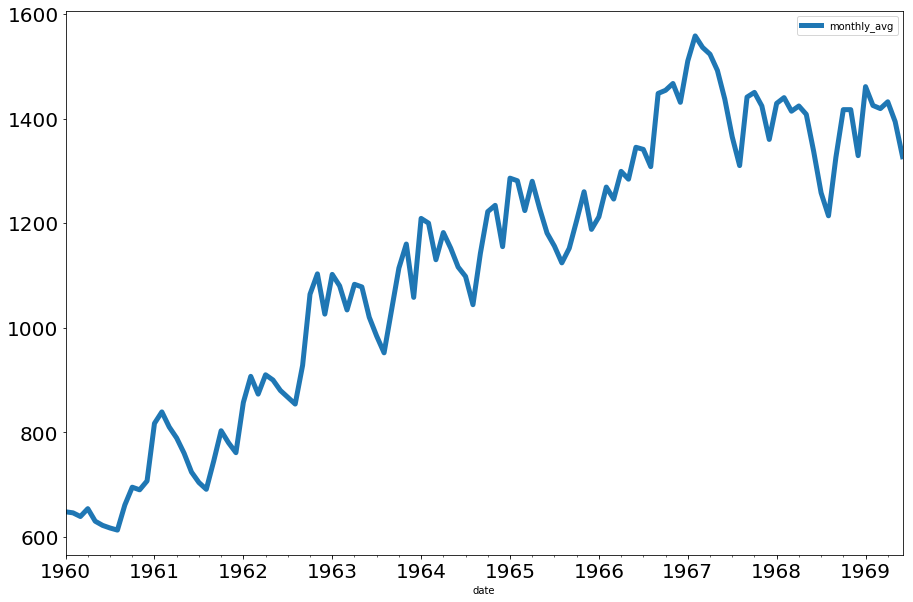

In [4]:
rides.plot(figsize=(15,10), linewidth=5, fontsize=20)

# Longterm upward trend

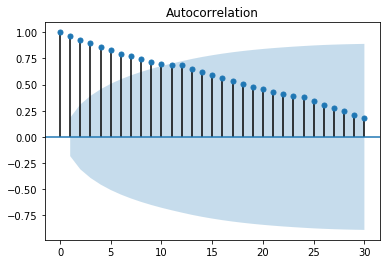

In [5]:
plot_acf(rides,lags=30);
# Beyond lags=5 is significant
# Default alpha is 0.05 means 95% confidents

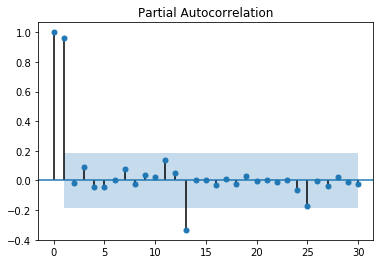

In [6]:
plot_pacf(rides, lags=30, method='ywmle');
# Better presentation btw origin series and lags
# btw lags 12, We are seen an significants

In [7]:
# Decompose timeseries
decomposition = sm.tsa.seasonal.seasonal_decompose(rides)

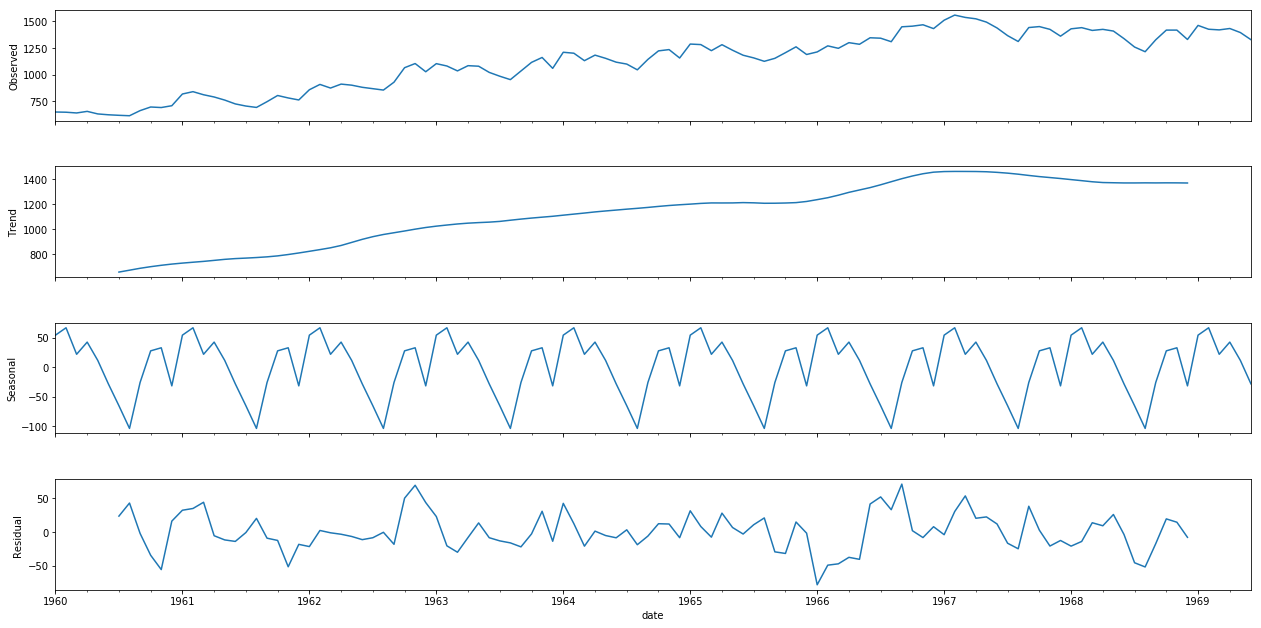

In [8]:
fig = decomposition.plot();
fig.set_size_inches(20,10)
plt.show()

In [9]:
# Trend:    longterm behavior, extract from origin.
# Seasonal: 
# Residual: noise
# ==> NOT remove anythings, just looking components
# ==> Decomposition: just understand data via VIZ

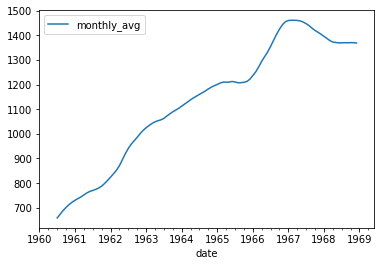

In [10]:
decomposition.trend.plot()

### Modelling

In [11]:
# AutoRegressive Models
# =========================================
# mean: AutoRegressive Models
# predict new value from previous time points
# prefer METHOD : AR(1)

# Why AR(1) is not the good way for prediction?
# ==> Because: can perform well, multicollinate.



In [12]:
# Moving Average Model
# =========================================
# use: average of previous errors to predict
# previous errors term
# prefer METHOD : MA(q)

# NOTES: Moving Average |= MA(q)

In [13]:
# ARMA Model
# =========================================
# combine: two previous model
# mean: autoregressive and moving average model
# prefer METHOD : ARMA (p, q)



In [14]:
# Library statsmodels
# =========================================
# statsmodel.tsa.arima_model import ARMA


In [15]:
# attr "endog"  :  array-like

## AR model
rides['monthly_avg'] = rides['monthly_avg'].astype('float32')
ar1 = ARMA(rides, order=(1,0))

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [16]:
model = ar1.fit()

In [17]:
preds = model.predict()

In [18]:
from sklearn.metrics import r2_score

r2_score(rides, preds)

0.9364449325497444

In [19]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:            monthly_avg   No. Observations:                  114
Model:                     ARMA(1, 0)   Log Likelihood                -623.827
Method:                       css-mle   S.D. of innovations             56.746
Date:                Wed, 22 May 2019   AIC                           1253.655
Time:                        10:25:20   BIC                           1261.864
Sample:                    01-01-1960   HQIC                          1256.986
                         - 06-01-1969                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1055.1645    214.153      4.927      0.000     635.433    1474.896
ar.L1.monthly_avg     0.9821      0.016     63.053      0.000       0.952       1.013
                        

In [20]:
for i in range(2,5):
    ar = ARMA(rides, order=(i,0))
    model = ar.fit()
    preds = model.predict()
    
    print(f'AR {i} return R-squared value of {r2_score(rides,preds)}')

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR 2 return R-squared value of 0.9367038911247049


/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR 3 return R-squared value of 0.9396015167034574


/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR 4 return R-squared value of 0.9395012601441027


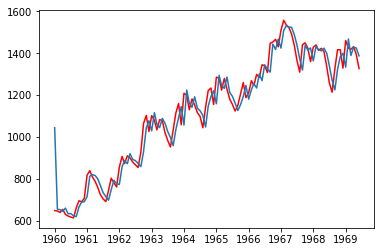

In [21]:
plt.plot(rides,'r')
plt.plot(preds)

In [22]:
preds

1960-01-01    1044.369042
1960-02-01     654.532360
1960-03-01     652.394795
1960-04-01     644.858854
1960-05-01     659.970035
1960-06-01     632.946224
1960-07-01     633.636750
1960-08-01     623.097630
1960-09-01     619.440529
1960-10-01     664.921653
1960-11-01     688.526612
1960-12-01     690.833253
1961-01-01     713.882391
1961-02-01     812.393887
1961-03-01     819.737703
1961-04-01     816.116469
1961-05-01     800.288580
1961-06-01     767.378197
1961-07-01     734.188104
1961-08-01     714.833079
1961-09-01     698.119874
1961-10-01     748.531911
1961-11-01     792.496673
1961-12-01     775.777319
1962-01-01     773.473862
1962-02-01     858.579490
1962-03-01     886.565926
1962-04-01     871.986834
1962-05-01     920.248039
1962-06-01     892.834014
                 ...     
1967-01-01    1424.848825
1967-02-01    1509.000613
1967-03-01    1531.396434
1967-04-01    1525.130565
1967-05-01    1524.312188
1967-06-01    1488.477276
1967-07-01    1439.222878
1967-08-01  

In [23]:
## MA model
ma1 = ARMA(rides, order=(0,1))

model = ma1.fit()
preds = model.predict()

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [24]:
print(r2_score(rides,preds))

0.6553317385597106


In [25]:
for i in range(2,5):
    ama1 = ARMA(rides, order=(0,i))

    model = ma1.fit()
    preds = model.predict()
    
    print(f'AR {i} return R-squared value of {r2_score(rides,preds)}')

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR 2 return R-squared value of 0.6553317385597106


/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR 3 return R-squared value of 0.6553317385597106


/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


AR 4 return R-squared value of 0.6553317385597106


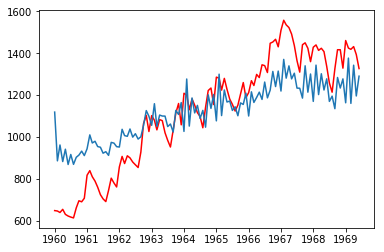

In [26]:
plt.plot(rides,'r')
plt.plot(preds)

In [27]:
## ARMA
arma = ARMA(rides, order=(1,1))
model3 = arma.fit()

preds3 = model3.predict()
print(r2_score(rides,preds3))

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


0.9369256833496875


### Forcasting

In [28]:
# Very Hard
# Selected: "p" and "q"

# ARIMA
# =========================================
# i: integrated
# different btw new period and previous period
# y(t) - y(t-1) = ARIMA(p, q)
# prefer METHOD: ARIMA(p, d, q)

In [35]:
## Test Stationarity

def test_stationarity(timeseries):
    
    # Check the mean & variances
    print("Values for various time series chunk is")
    
    ## Visual Inspection
    for i in np.array_split(timeseries,5):
        # Split timeseries into 5 parts
        # if mean changed mean changed variances
        print(i.shape)
        print(round(i.mean()))
        print(round(i.var()))
        print("__"*25)
        
        
    ## Perform Dickey-Fuller test
    # [LIBRARY] tsa.statools import adfuller
    print("Values of the Dickey Fuller Test: ")
    # ==> return approximate 5 values.
    adf, p_values = adfuller(timeseries)[0:2]
    
    print(adf, p_values)

In [36]:
test_stationarity(rides['monthly_avg'].values)

Values for various time series chunk is
(23,)
708.0
4933.0
__________________________________________________
(23,)
974.0
9881.0
__________________________________________________
(23,)
1175.0
4146.0
__________________________________________________
(23,)
1369.0
12865.0
__________________________________________________
(22,)
1388.0
3983.0
__________________________________________________
Values of the Dickey Fuller Test: 
-1.5365971444531608 0.515335879782173


In [37]:
# HO: non-stationary
# H1: is stationary

# Base on this info, 
# pvalue is greater than alpha value
# we are not be able to reject hypothesis
# ==> Strong evidence
# ==> Timeseries is not stationary

In [39]:
## Data Transformation

rides['diff1'] = rides.monthly_avg.diff(1)
rides['diff2'] = rides.monthly_avg.diff(2)
rides['diff3'] = rides.monthly_avg.diff(3)
rides['diff4'] = rides.monthly_avg.diff(4)
rides['diff5'] = rides.monthly_avg.diff(5)

# diff(1) means 1st value is NaN

In [40]:
rides.head()

,monthly_avg,diff1,diff2,diff3,diff4,diff5
date,,,,,,
1960-01-01,648.0,NaN,NaN,NaN,NaN,NaN
1960-02-01,646.0,-2.0,NaN,NaN,NaN,NaN
1960-03-01,639.0,-7.0,-9.0,NaN,NaN,NaN
1960-04-01,654.0,15.0,8.0,6.0,NaN,NaN
1960-05-01,630.0,-24.0,-9.0,-16.0,-18.0,NaN


In [43]:
test_stationarity(rides.diff1.dropna().values)

# pvalue is still same until diff4
# means pvalue > alpha

Values for various time series chunk is
(23,)
5.0
1214.0
__________________________________________________
(23,)
17.0
3100.0
__________________________________________________
(23,)
2.0
4450.0
__________________________________________________
(22,)
5.0
2837.0
__________________________________________________
(22,)
1.0
4298.0
__________________________________________________
Values of the Dickey Fuller Test: 
-1.9386960651548377 0.3140818370608534


In [44]:
test_stationarity(rides.diff5.dropna().values)

# It's now ==> pvalue < alpha
# can reject Hypotheis
# ==> timeseries is now stationary

Values for various time series chunk is
(22,)
44.0
8466.0
__________________________________________________
(22,)
63.0
11753.0
__________________________________________________
(22,)
15.0
10363.0
__________________________________________________
(22,)
52.0
11029.0
__________________________________________________
(21,)
-2.0
10264.0
__________________________________________________
Values of the Dickey Fuller Test: 
-3.0157599803106034 0.033448598963516776
